In [1]:
import copy
import random
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)    
matplotlib.rcParams['axes.unicode_minus'] = False      
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', 150)

from xgboost import XGBRegressor

import torch 
import torch.nn as nn 
import torch.optim as optim 
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
torch.set_printoptions(sci_mode=False)
random_seed = 616

In [2]:
def plot_hongsunum(predict_df, names = None, one=None):
    if names == None :
        pred_names = ['true'] + list(predict_df.filter(regex='pred_').columns)
    else:
        pred_names = ['true'] + [f"pred_{name}" for name in names]
    
    if one == None:
        for idx in predict_df['홍수사상번호'].unique():
            predict_df.loc[predict_df['홍수사상번호'] ==idx][pred_names].plot(figsize=(20,12))
            plt.legend()
            plt.title(f"홍수사상번호 : {idx}")
            plt.show()
    else:
        predict_df[pred_names].plot(figsize=(20,12))
        plt.legend()
        plt.show()

In [9]:
predict_dnn = pd.read_csv('predict/predict_df_DNN.csv', index_col=0)
predict_ml = pd.read_csv('predict/predict_df_ML.csv', index_col=0)

score_df_dnn = pd.read_csv('predict/score_df_DNN.csv', index_col=0)
score_df_dnn.columns = [['DNN']*4, score_df_dnn.columns]
score_df_ml = pd.read_csv('predict/score_df_ML.csv', index_col=0, header=[0, 1])

In [10]:
predict_dnn

,홍수사상번호,연,월,일,시간,true,pred_DNN_base,pred_DNN_base_2123,pred_DNN_t-1 t+1,pred_DNN_waterlevel t-1 t+1,pred_DNN_3 cluster,pred_DNN_4 cluster,pred_DNN_5 cluster,pred_DNN_6 cluster,pred_DNN_log,pred_DNN_origin + log,pred_DNN_x2,pred_DNN_5cluster + x2,pred_DNN_5cluster + t,"pred_DNN_t + x2_(2, 2, 2, 0.5)",pred_DNN_5cluster + t + x2,pred_DNN_t + x2
0,1,2006,7,10,8,189.10,71.19,100.11,18.13,3.66,184.60,115.58,79.97,132.30,116.40,88.00,45.16,117.87,2.34,119.37,90.76,1.95
1,1,2006,7,10,9,216.95,88.07,123.35,18.13,3.66,204.34,129.52,93.77,142.05,115.66,91.82,45.24,124.74,2.34,119.37,90.76,1.95
2,1,2006,7,10,10,251.42,97.01,132.23,23.65,3.79,213.69,133.33,99.67,146.58,116.12,95.50,46.13,129.36,5.07,124.35,99.81,1.95
3,1,2006,7,10,11,302.81,162.93,198.75,30.37,5.16,270.87,167.25,139.92,182.07,115.61,115.02,74.43,153.28,13.76,131.02,110.06,1.95
4,1,2006,7,10,12,384.78,216.37,245.02,34.41,7.65,316.66,197.96,176.59,218.78,117.78,136.78,107.81,181.35,21.91,137.53,118.15,1.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,25,2017,7,18,18,513.37,450.73,433.51,406.87,459.50,438.12,399.96,480.01,496.14,341.81,390.81,484.42,490.50,437.41,323.89,442.64,400.11
2887,25,2017,7,18,19,502.85,457.24,453.79,408.32,469.87,433.27,398.58,479.55,495.51,286.46,365.73,480.43,481.44,431.94,323.30,466.18,401.06
2888,25,2017,7,18,20,491.95,455.30,455.81,411.90,465.56,428.14,395.98,475.86,493.37,260.14,353.93,475.08,475.04,428.93,320.48,461.50,399.48
2889,25,2017,7,18,21,481.10,446.36,447.61,407.55,456.91,420.03,390.50,469.25,487.23,247.32,345.82,466.05,467.55,423.10,316.86,453.36,394.51


In [11]:
predict_df = pd.merge(predict_dnn, predict_ml)
score_df = pd.concat([score_df_ml, score_df_dnn], axis=1)

In [12]:
predict_df.to_csv("predict/predict_df_merge.csv")
score_df.to_csv("predict/score_df_merge.csv")

In [13]:
score_df

LR                           DT                       \
                      RMSE RMSLE R2_score  MAPE    RMSE RMSLE R2_score  MAPE   
base                884.28  1.83     0.84 45.92 1128.63  0.53     0.73 57.20   
base_2123           906.61  1.91     0.84 47.59 1182.44  0.55     0.72 58.89   
t-1 t+1             842.03  1.80     0.85 45.41 1096.56  0.50     0.75 49.46   
waterlevel t-1 t+1  885.96  1.79     0.84 45.99 1155.14  0.55     0.72 53.80   
3 cluster           884.93  1.70     0.84 45.79 1129.31  0.55     0.73 60.40   
4 cluster           888.91  1.67     0.83 45.44 1147.74  0.54     0.72 58.30   
5 cluster           889.01  1.70     0.83 46.46 1113.78  0.55     0.74 61.74   
6 cluster           889.01  1.70     0.83 46.46 1137.28  0.56     0.73 61.65   
log                1442.59  1.63     0.56 91.82 1126.59  0.53     0.73 56.86   
origin + log       1442.59  1.63     0.56 91.82 1126.59  0.53     0.73 56.86   
x2                  537.08  1.14     0.94 42.35 1155.87  0.54     0.72 59.07   
5cluster + x2       544.02  1.16     0.94 49.04 1112.32  0.55     0.74 64.15   
5cluster + t        507.97  1.18     0.95 46.18 1157.68  0.52     0.72 51.66   
t + x2              497.69  1.14     0.95 39.53 1126.04  0.52     0.73 52.64   
5cluster + t + x2   507.97  1.18     0.95 46.18 1157.68  0.52     0.72 51.66   

                   SGDRegressor                       KernelRidge        \
                           RMSE RMSLE R2_score   MAPE        RMSE RMSLE   
base                     908.58  1.94     0.83  48.34     1445.30  4.31   
base_2123                911.34  2.03     0.84  49.60     1466.98  4.26   
t-1 t+1                  890.92  1.98     0.83  49.38     1430.58  4.32   
waterlevel t-1 t+1       940.83  2.02     0.81  49.95     1453.28  4.32   
3 cluster                914.61  1.75     0.82  48.82     1429.99  4.28   
4 cluster                878.98  1.79     0.84  47.84     1435.74  4.30   
5 cluster                907.92  1.82     0.83  48.98     1438.71  4.30   
6 cluster                866.48  1.86     0.84  49.72     1438.71  4.30   
log                     1634.47  1.57     0.44 109.69     2021.06  3.84   
origin + log            1661.74  1.51     0.42 113.34     2021.06  3.84   
x2                       530.23  0.99     0.94  46.75     1314.17  4.66   
5cluster + x2            557.27  1.13     0.93  46.11     1321.95  4.67   
5cluster + t             507.69  1.20     0.95  52.23     1310.42  4.69   
t + x2                   486.73  0.95     0.95  43.45     1300.67  4.69   
5cluster + t + x2        529.79  1.20     0.94  50.10     1310.42  4.69   

                                      XGB                         DNN        \
                   R2_score  MAPE    RMSE RMSLE R2_score  MAPE   RMSE RMSLE   
base                   0.56 80.92  984.81  0.46     0.80 43.29 494.98  0.50   
base_2123              0.57 80.61 1028.46  0.54     0.79 44.90 500.06  0.40   
t-1 t+1                0.57 81.40  995.59  0.46     0.79 41.27 460.03  0.36   
waterlevel t-1 t+1     0.56 81.18 1047.31  0.47     0.77 45.38 543.55  0.40   
3 cluster              0.57 80.49 1001.29  0.49     0.79 47.60 510.83  0.51   
4 cluster              0.57 80.75 1000.71  0.46     0.79 47.62 522.74  0.47   
5 cluster              0.57 80.87 1003.92  0.52     0.79 47.84 487.54  0.45   
6 cluster              0.57 80.87 1003.92  0.52     0.79 47.84 484.12  0.39   
log                    0.14 79.41  985.59  0.46     0.80 43.41 618.05  0.62   
origin + log           0.14 79.41  985.59  0.46     0.80 43.41 533.76  0.49   
x2                     0.64 84.81  984.81  0.46     0.80 43.29 442.43  0.45   
5cluster + x2          0.63 84.91 1003.92  0.52     0.79 47.84 429.78  0.40   
5cluster + t           0.64 85.22  995.33  1.04     0.79 47.22 466.19  0.49   
t + x2                 0.64 85.06  995.59  0.46     0.79 41.27 428.76  0.48   
5cluster + t + x2      0.64 85.22  995.33  1.04     0.79 47.22 448.49  0.35   

                                   
       

In [14]:
score_df["DNN"].sort_values('RMSE')

,RMSE,RMSLE,R2_score,MAPE
t + x2,428.76,0.48,0.96,22.06
5cluster + x2,429.78,0.40,0.96,23.09
x2,442.43,0.45,0.96,24.45
5cluster + t + x2,448.49,0.35,0.96,26.11
t-1 t+1,460.03,0.36,0.96,21.60
5cluster + t,466.19,0.49,0.95,25.82
6 cluster,484.12,0.39,0.95,22.49
5 cluster,487.54,0.45,0.95,25.99
base,494.98,0.50,0.95,23.93
base_2123,500.06,0.40,0.95,26.11


In [15]:
score_df.loc[:,score_df.columns.get_level_values(1).isin({'RMSE', 'RMSLE'})]

LR            DT       SGDRegressor       KernelRidge  \
                      RMSE RMSLE    RMSE RMSLE         RMSE RMSLE        RMSE   
base                884.28  1.83 1128.63  0.53       908.58  1.94     1445.30   
base_2123           906.61  1.91 1182.44  0.55       911.34  2.03     1466.98   
t-1 t+1             842.03  1.80 1096.56  0.50       890.92  1.98     1430.58   
waterlevel t-1 t+1  885.96  1.79 1155.14  0.55       940.83  2.02     1453.28   
3 cluster           884.93  1.70 1129.31  0.55       914.61  1.75     1429.99   
4 cluster           888.91  1.67 1147.74  0.54       878.98  1.79     1435.74   
5 cluster           889.01  1.70 1113.78  0.55       907.92  1.82     1438.71   
6 cluster           889.01  1.70 1137.28  0.56       866.48  1.86     1438.71   
log                1442.59  1.63 1126.59  0.53      1634.47  1.57     2021.06   
origin + log       1442.59  1.63 1126.59  0.53      1661.74  1.51     2021.06   
x2                  537.08  1.14 1155.87  0.54       530.23  0.99     1314.17   
5cluster + x2       544.02  1.16 1112.32  0.55       557.27  1.13     1321.95   
5cluster + t        507.97  1.18 1157.68  0.52       507.69  1.20     1310.42   
t + x2              497.69  1.14 1126.04  0.52       486.73  0.95     1300.67   
5cluster + t + x2   507.97  1.18 1157.68  0.52       529.79  1.20     1310.42   

                             XGB          DNN        
                   RMSLE    RMSE RMSLE   RMSE RMSLE  
base                4.31  984.81  0.46 494.98  0.50  
base_2123           4.26 1028.46  0.54 500.06  0.40  
t-1 t+1             4.32  995.59  0.46 460.03  0.36  
waterlevel t-1 t+1  4.32 1047.31  0.47 543.55  0.40  
3 cluster           4.28 1001.29  0.49 510.83  0.51  
4 cluster           4.30 1000.71  0.46 522.74  0.47  
5 cluster           4.30 1003.92  0.52 487.54  0.45  
6 cluster           4.30 1003.92  0.52 484.12  0.39  
log                 3.84  985.59  0.46 618.05  0.62  
origin + log        3.84  985.59  0.46 533.76  0.49  
x2                  4.66  984.81  0.46 442.43  0.45  
5cluster + x2       4.67 1003.92  0.52 429.78  0.40  
5cluster + t        4.69  995.33  1.04 466.19  0.49  
t + x2              4.69  995.59  0.46 428.76  0.48  
5cluster + t + x2   4.69  995.33  1.04 448.49  0.35

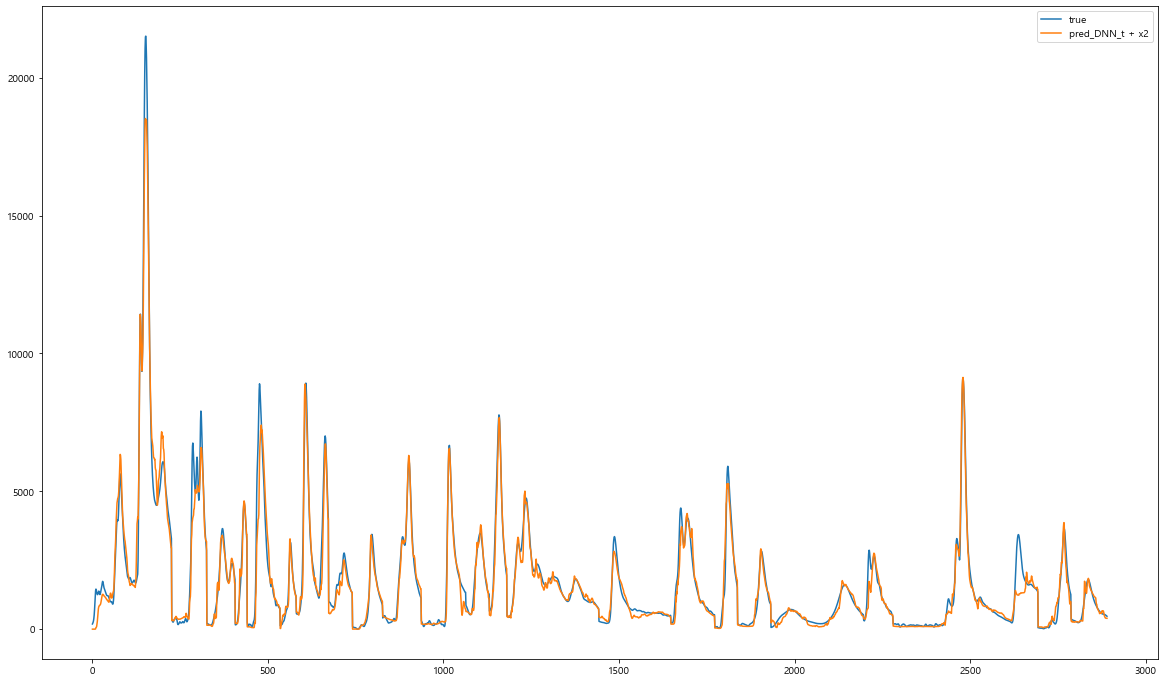

In [16]:
plot_hongsunum(predict_df, names = ['DNN_t + x2'], one=True)

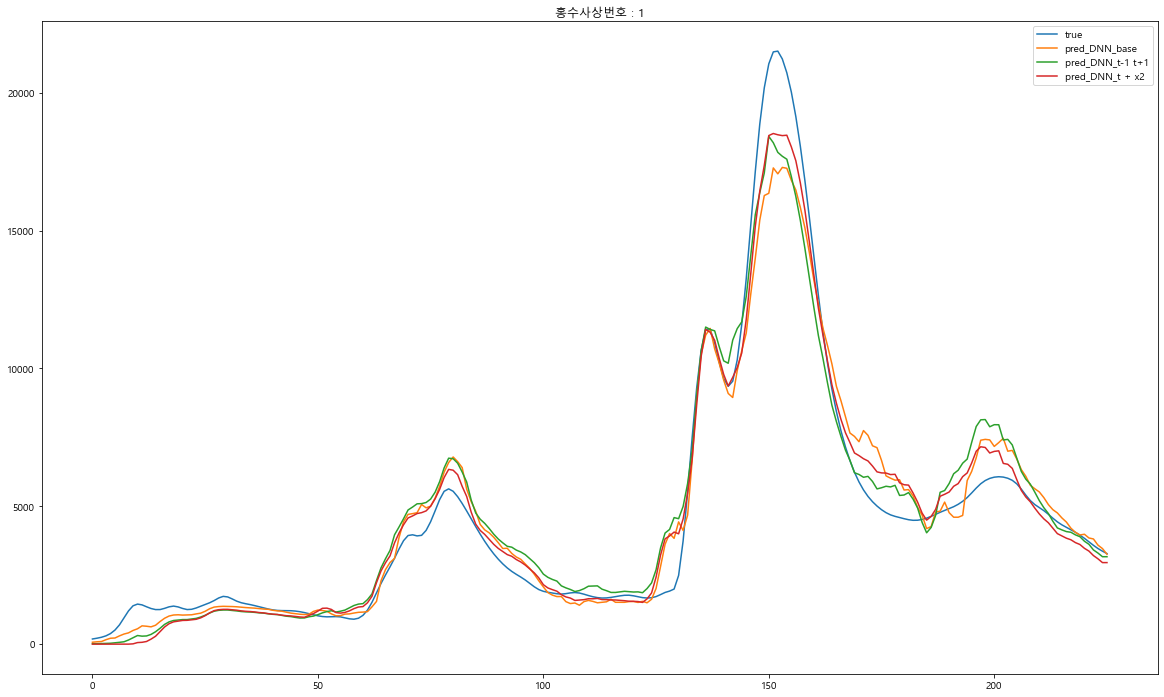

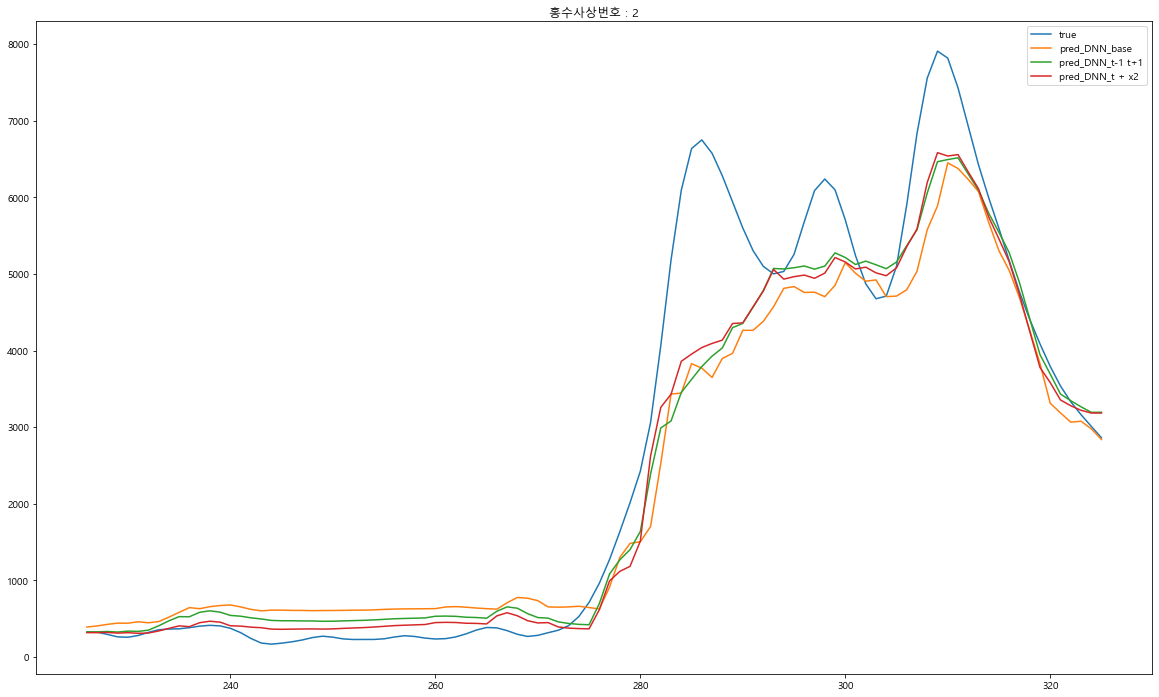

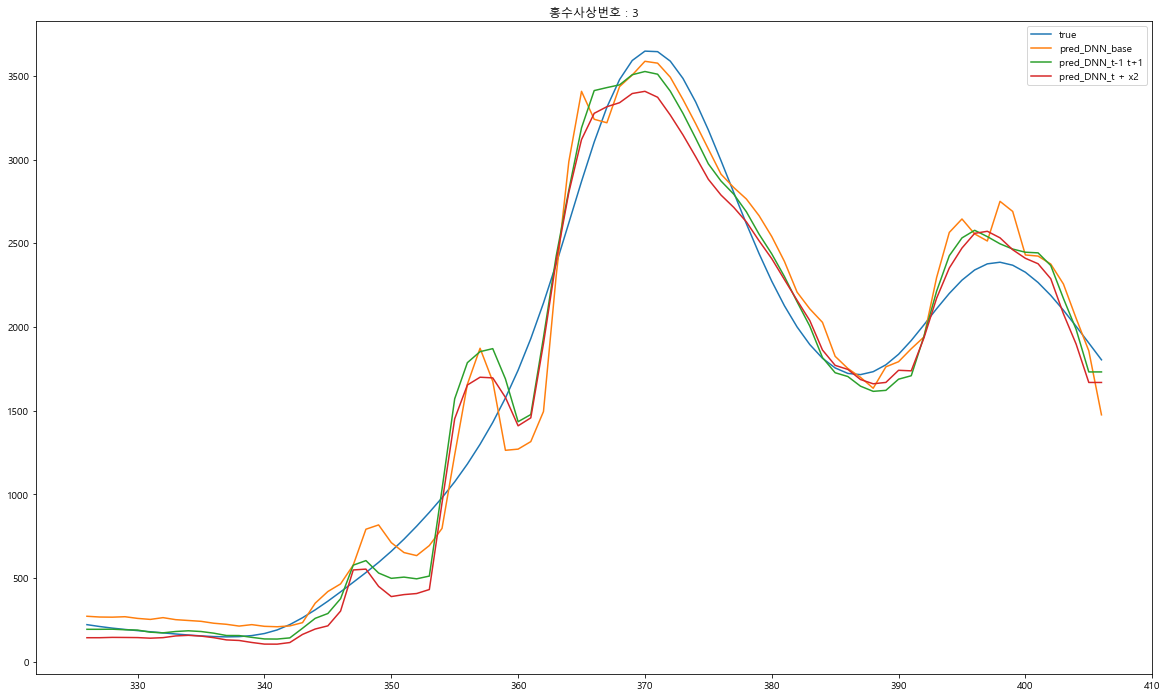

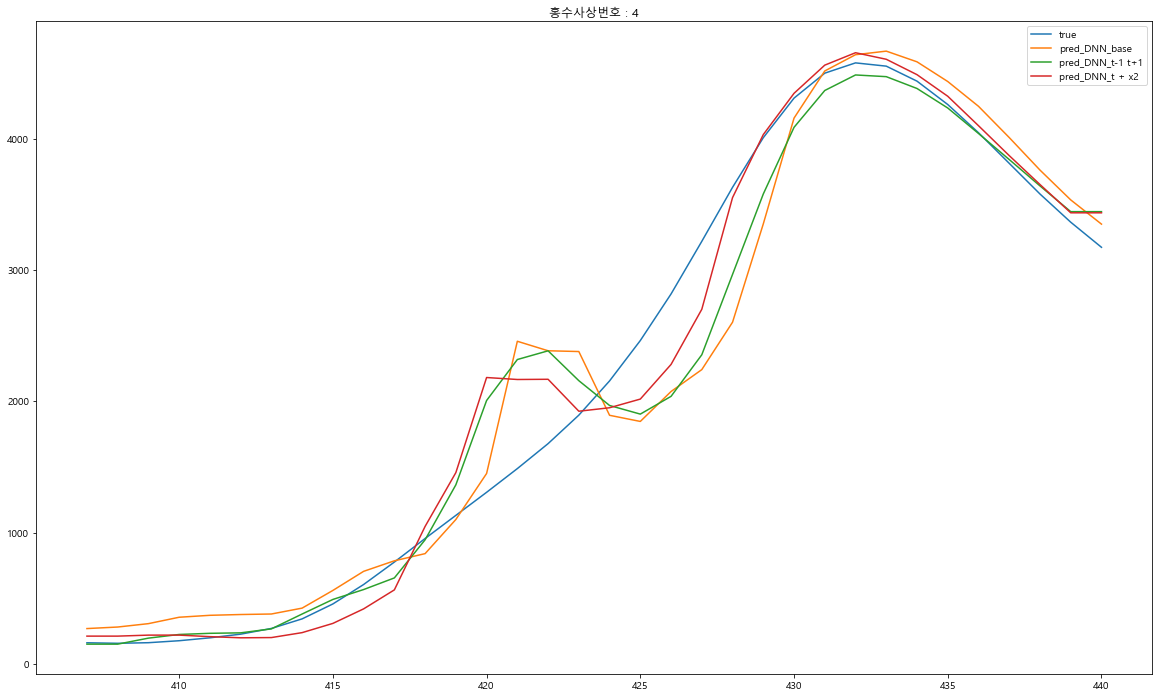

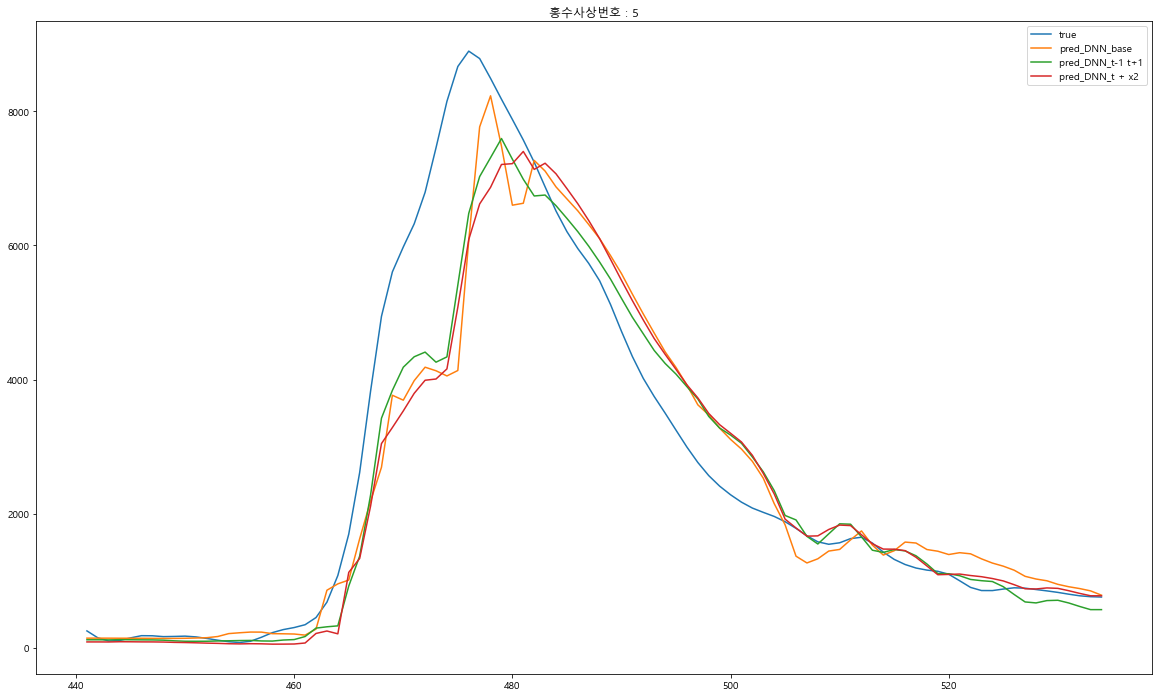

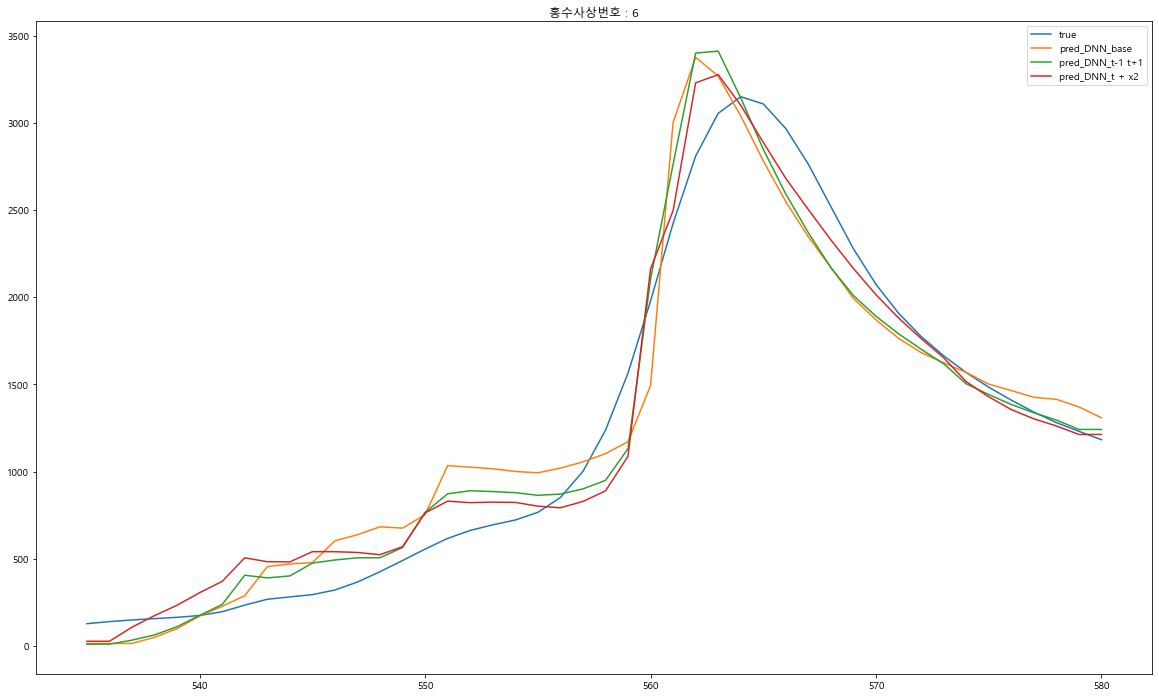

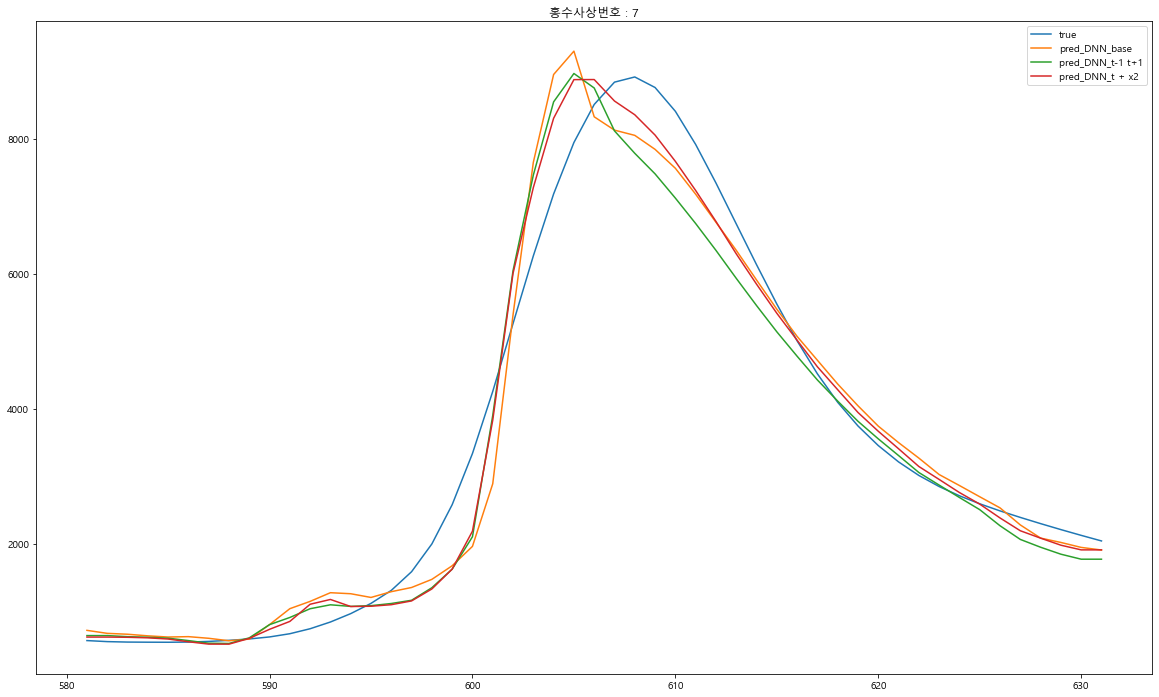

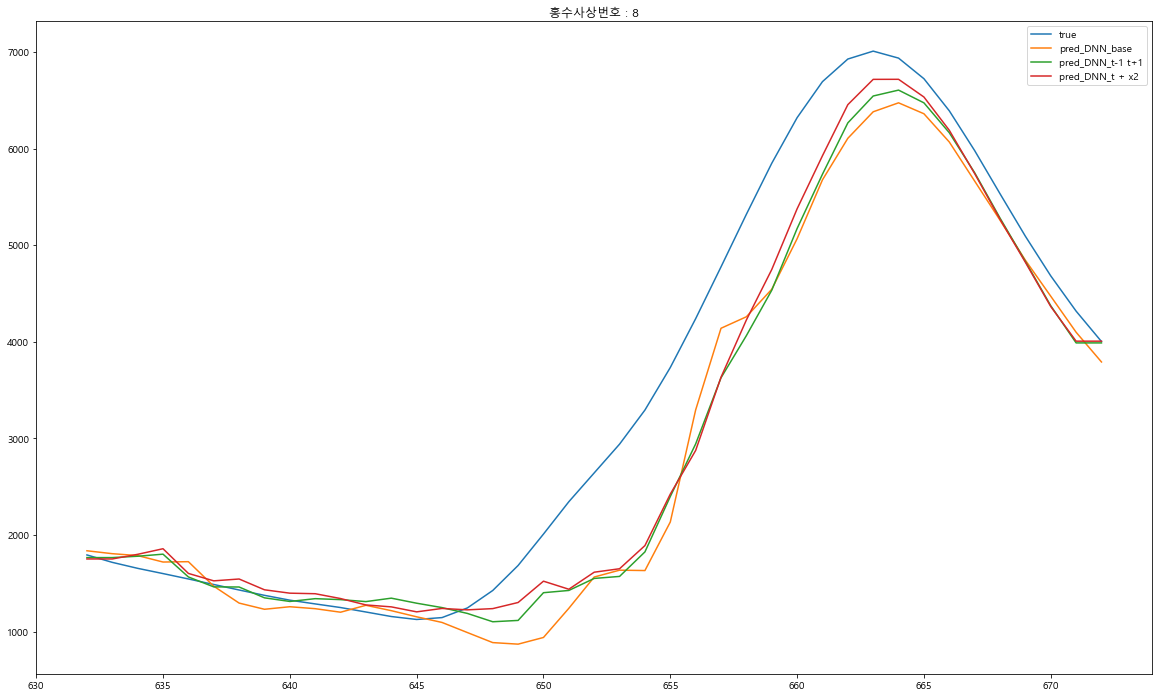

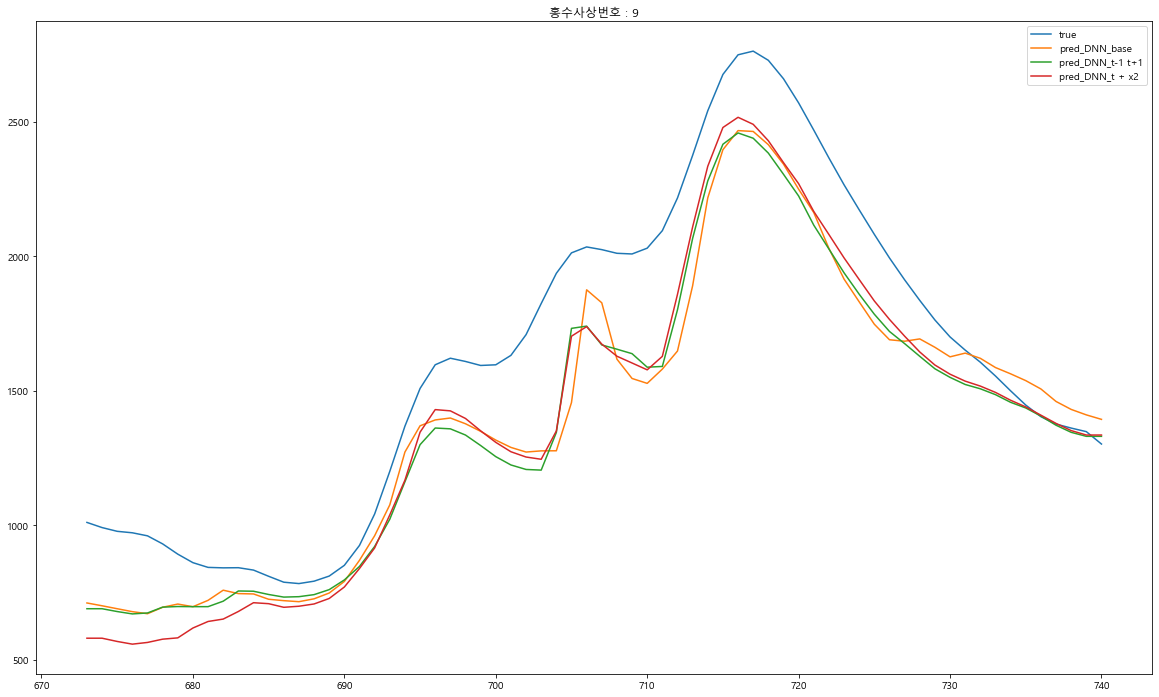

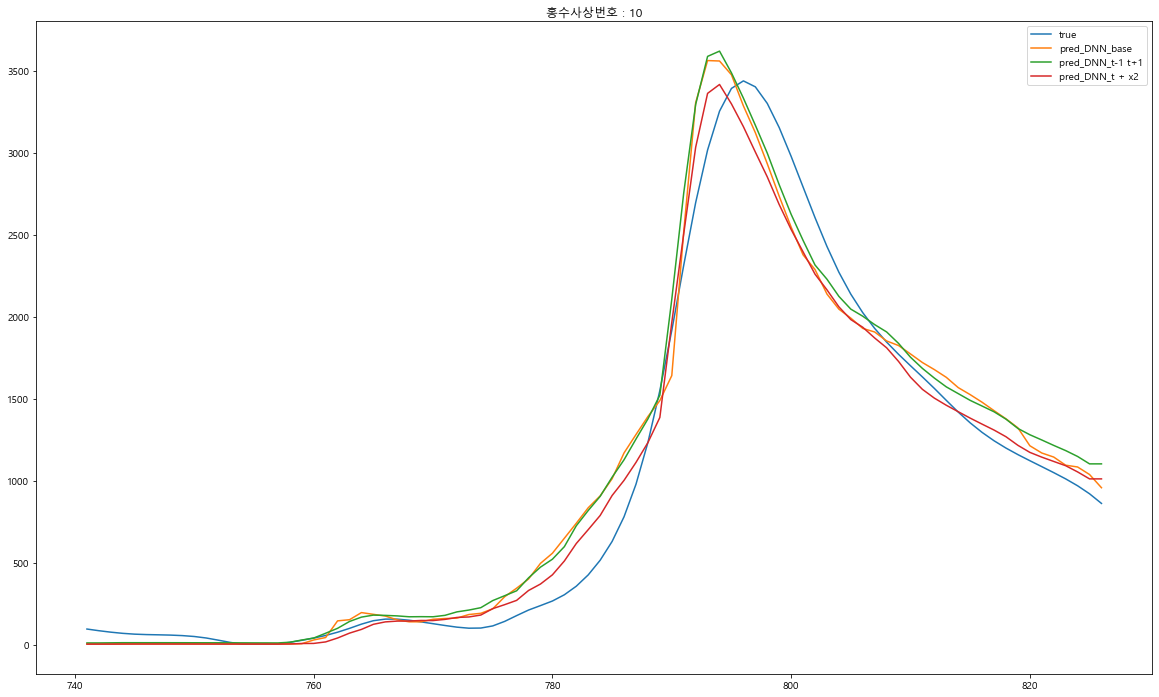

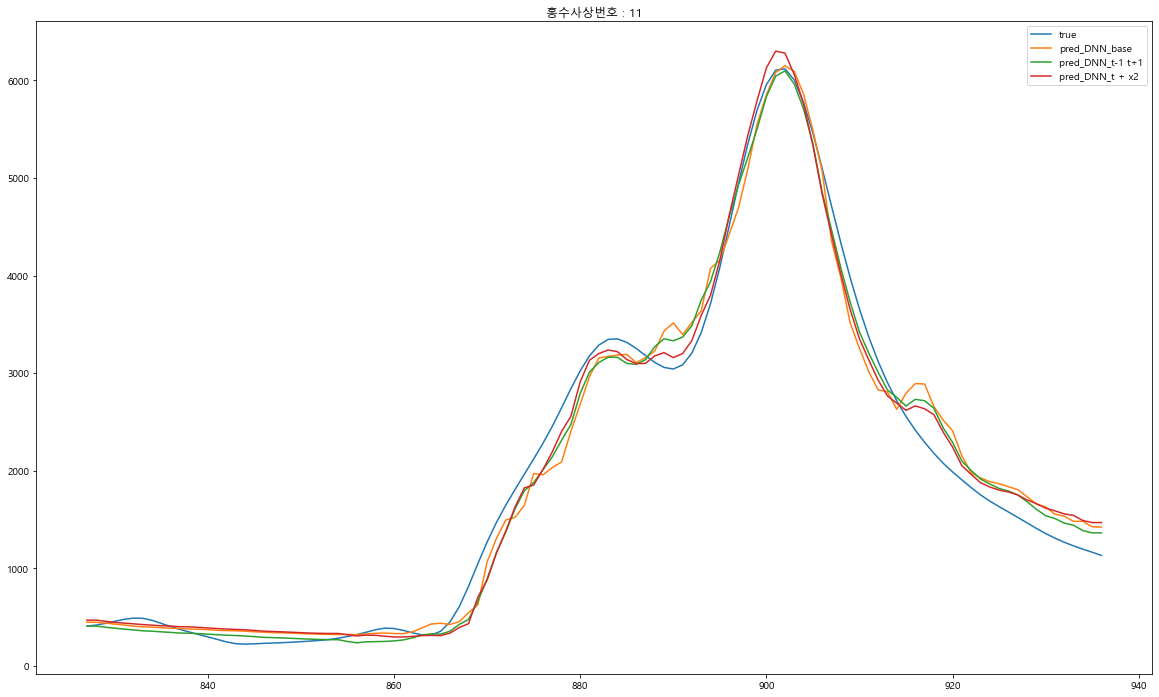

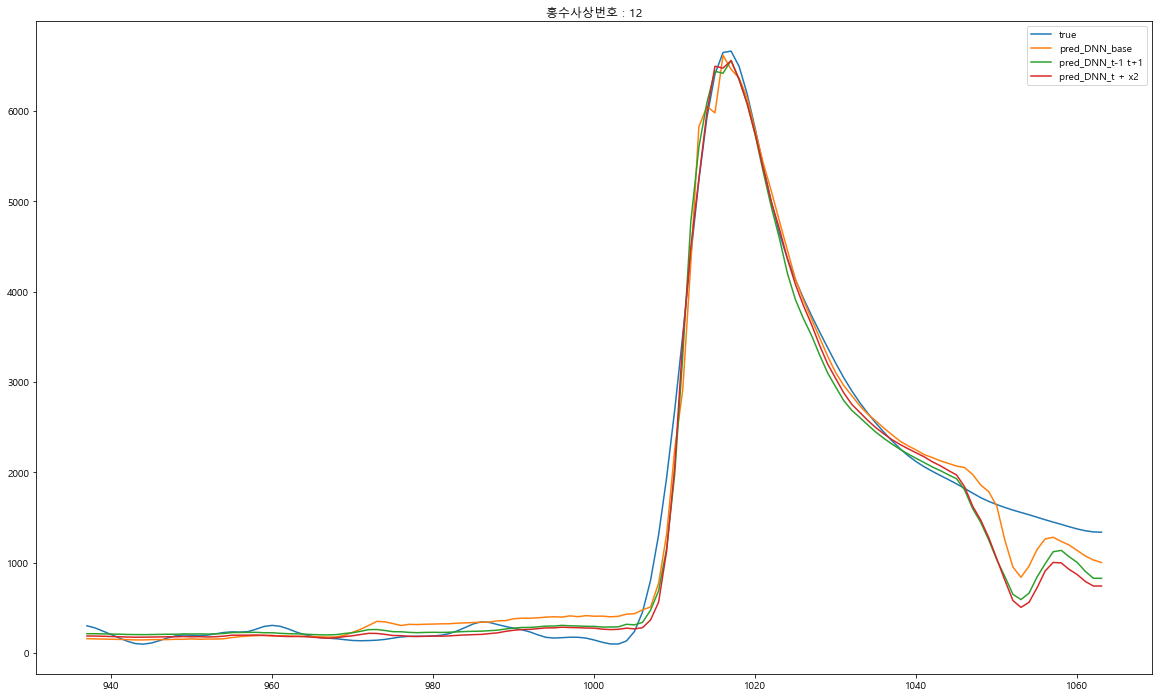

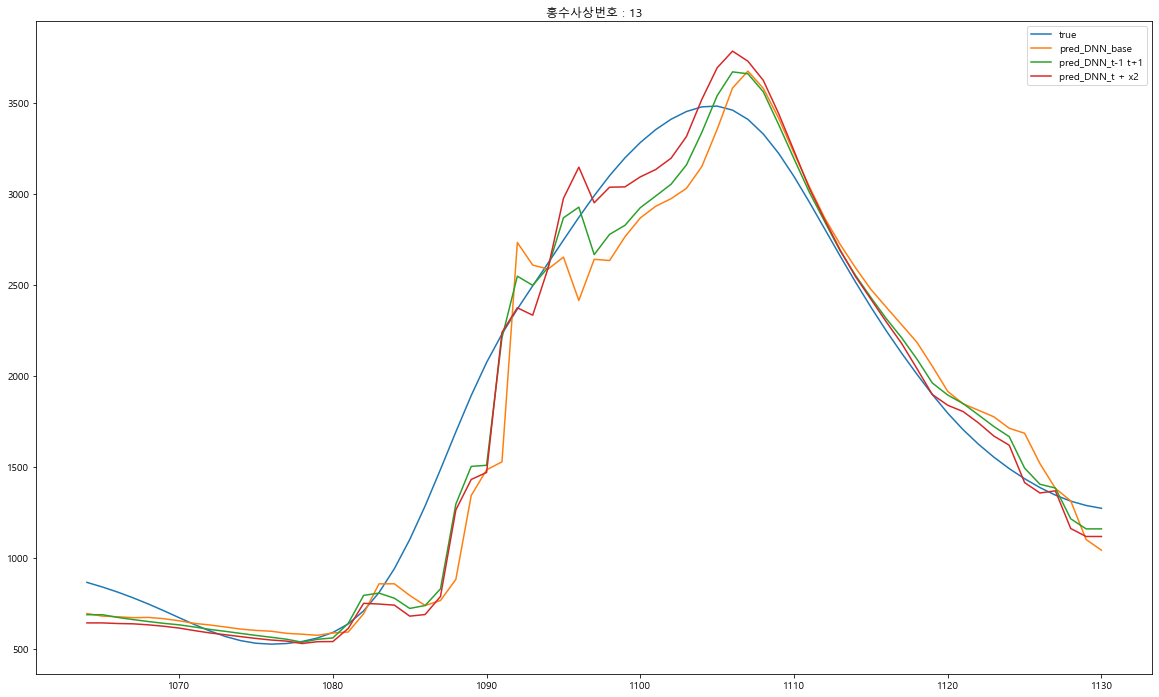

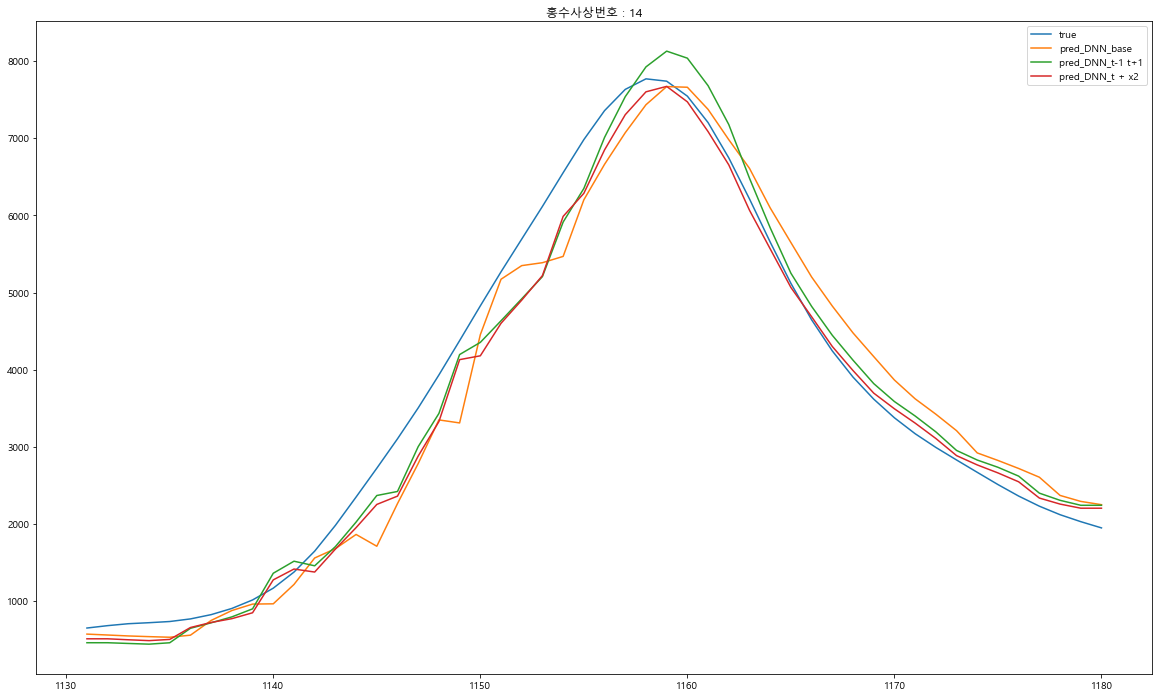

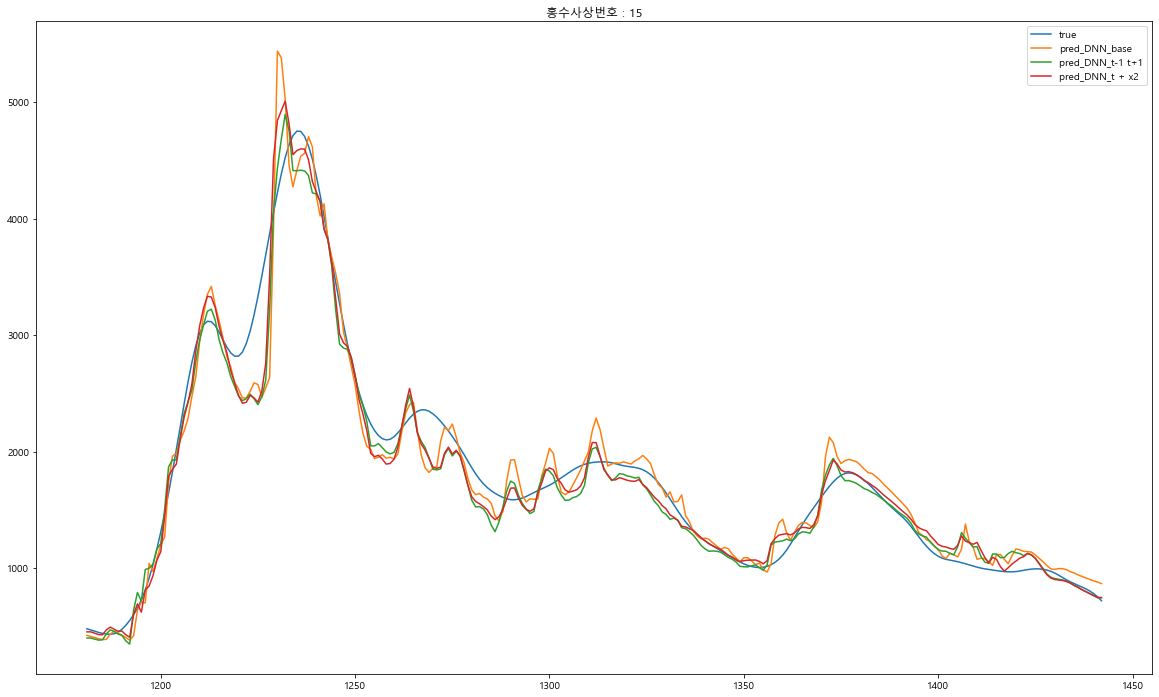

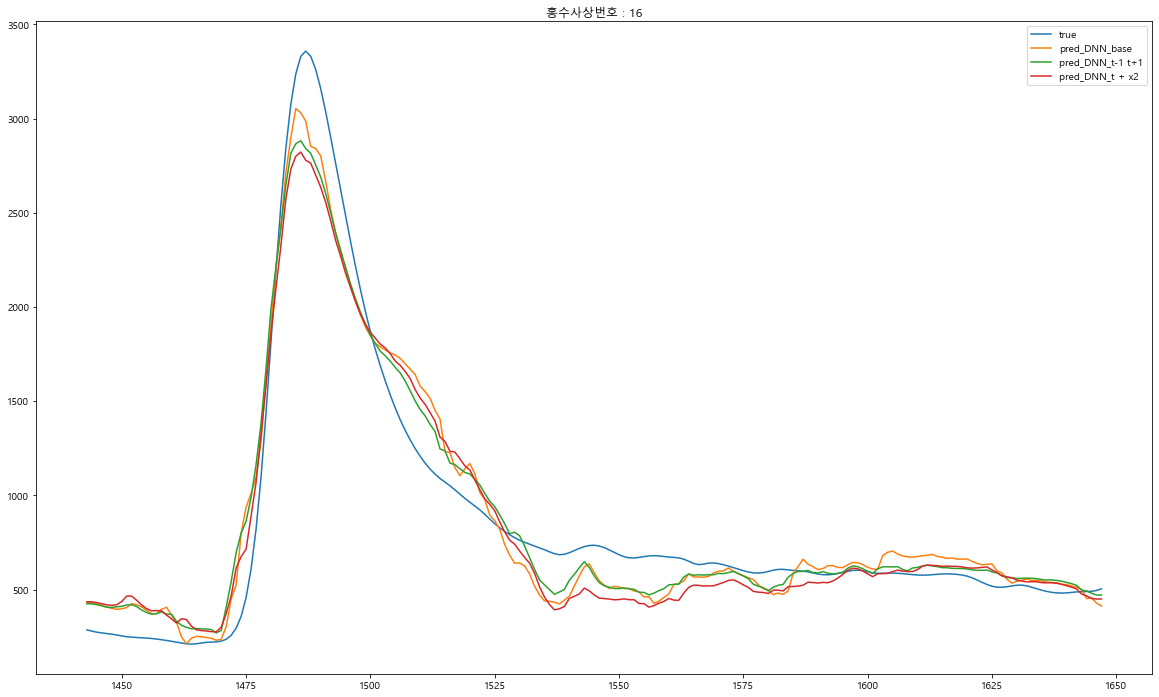

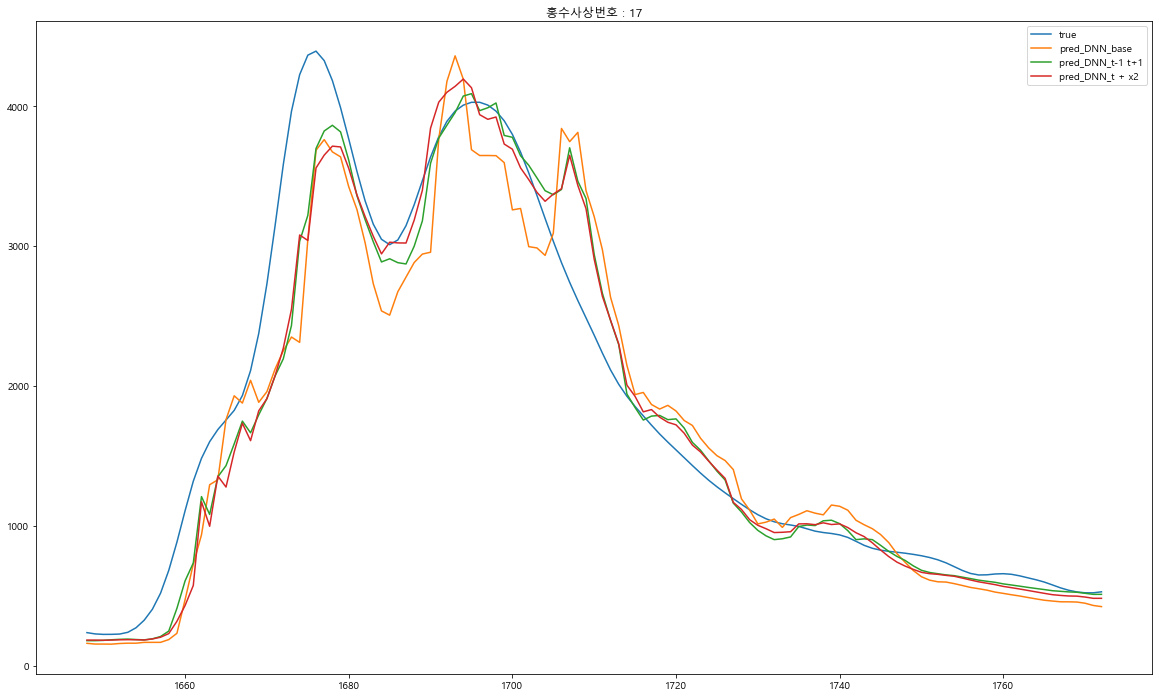

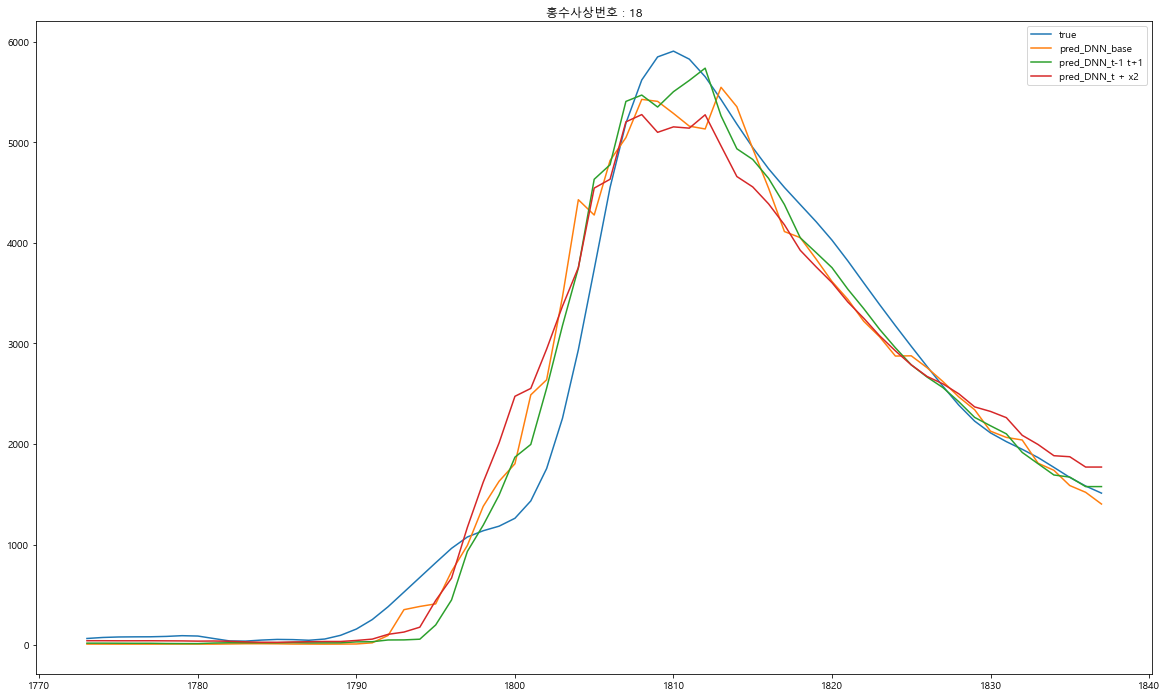

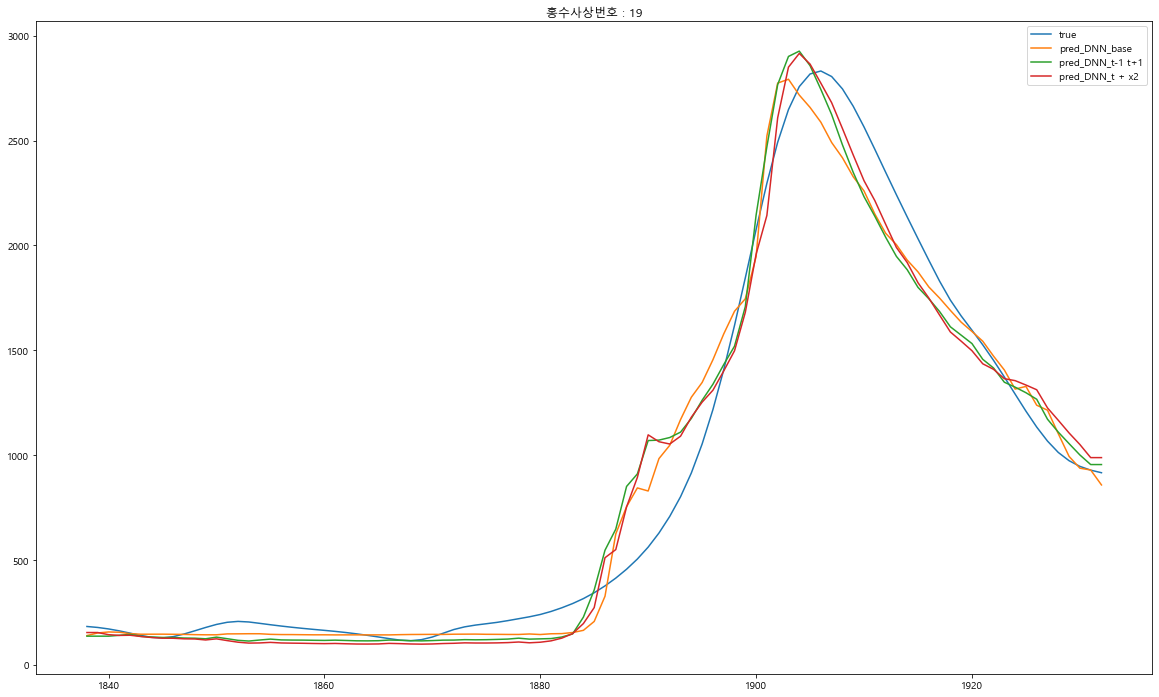

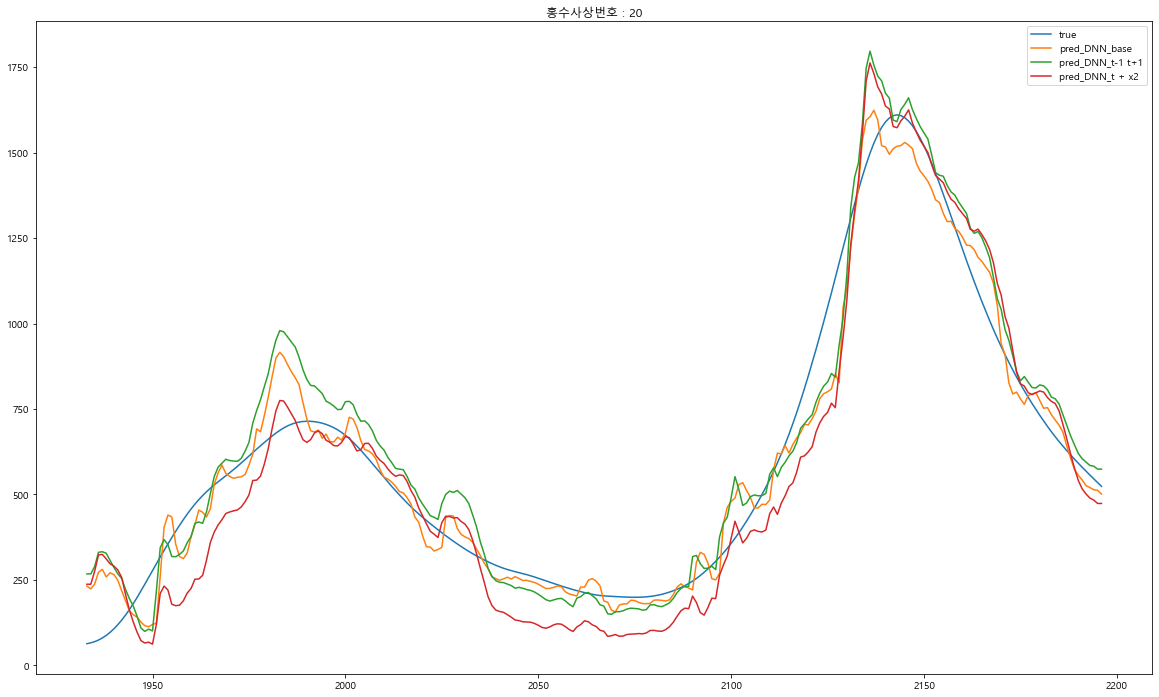

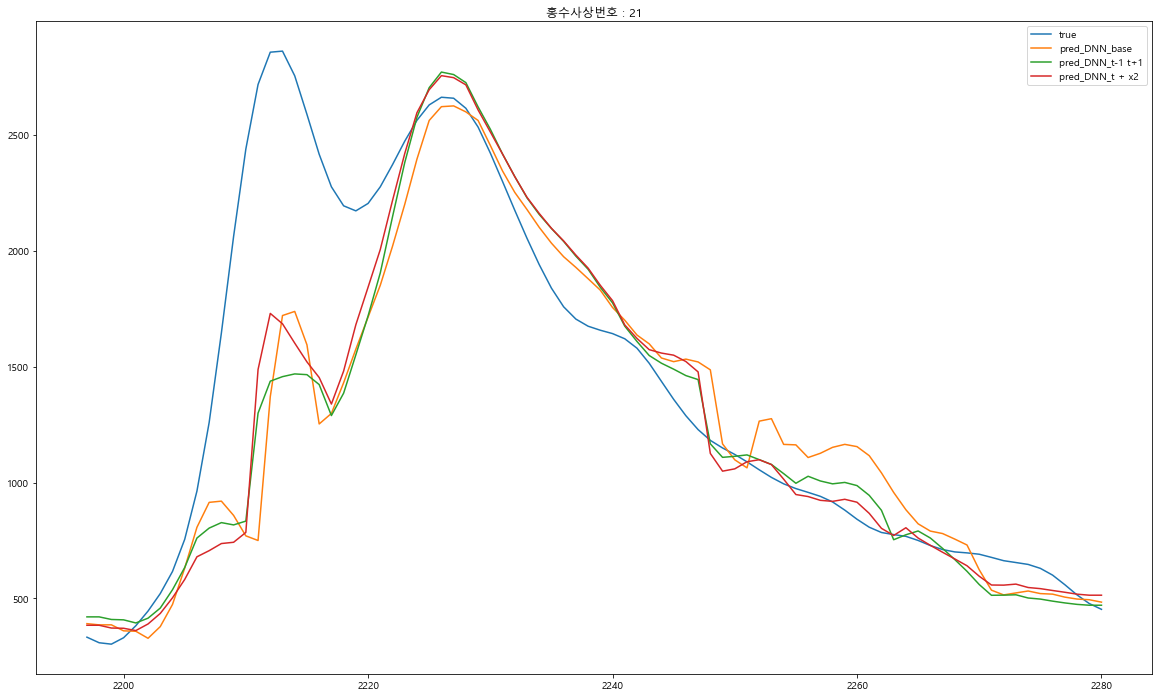

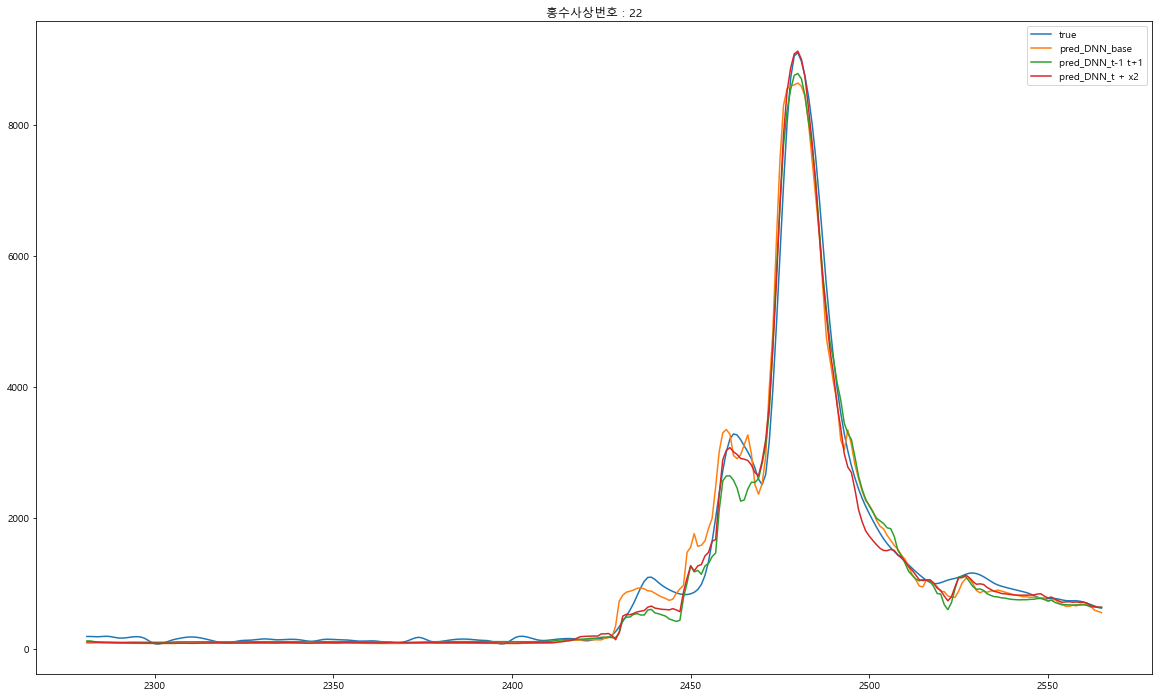

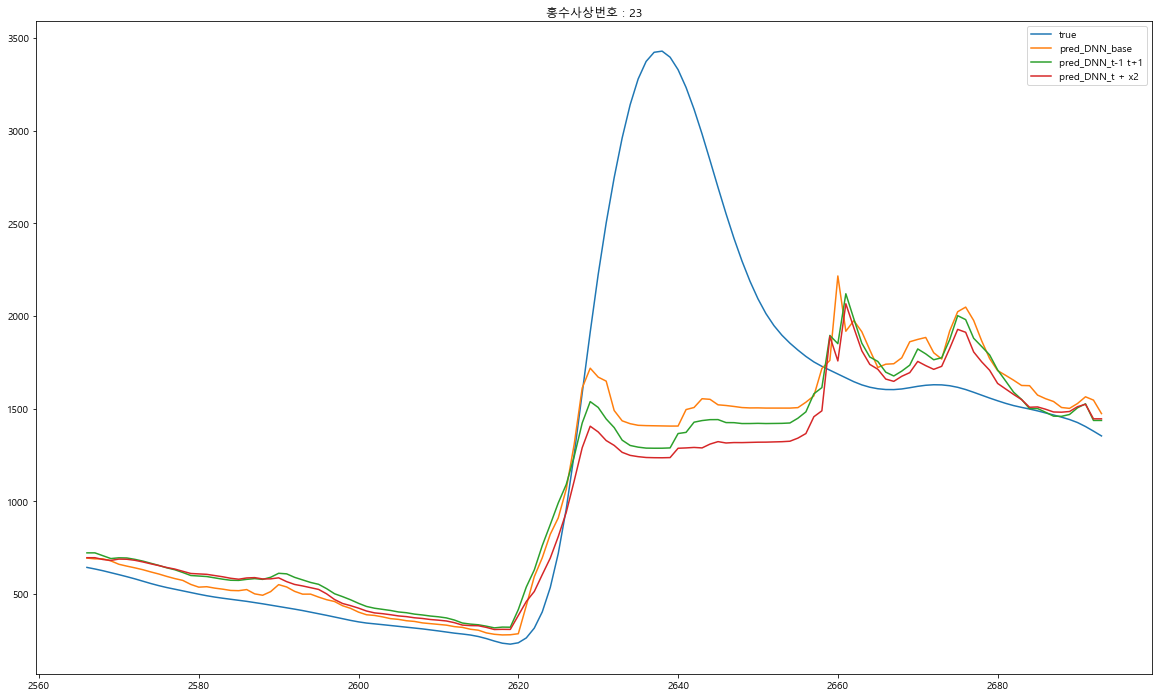

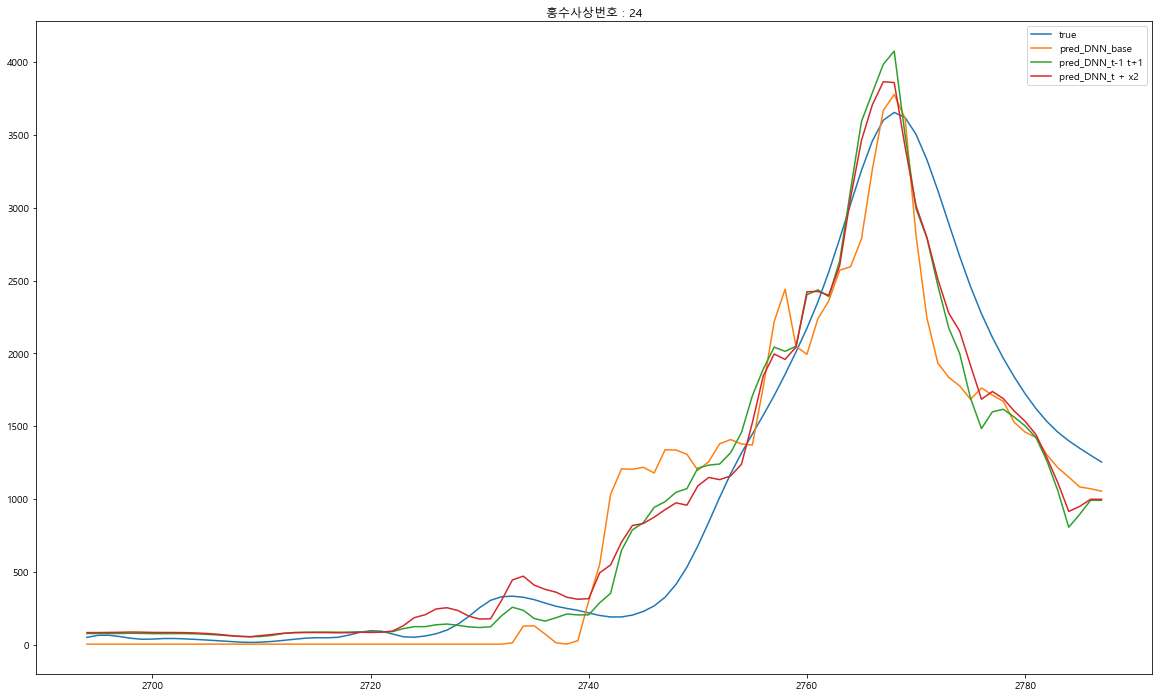

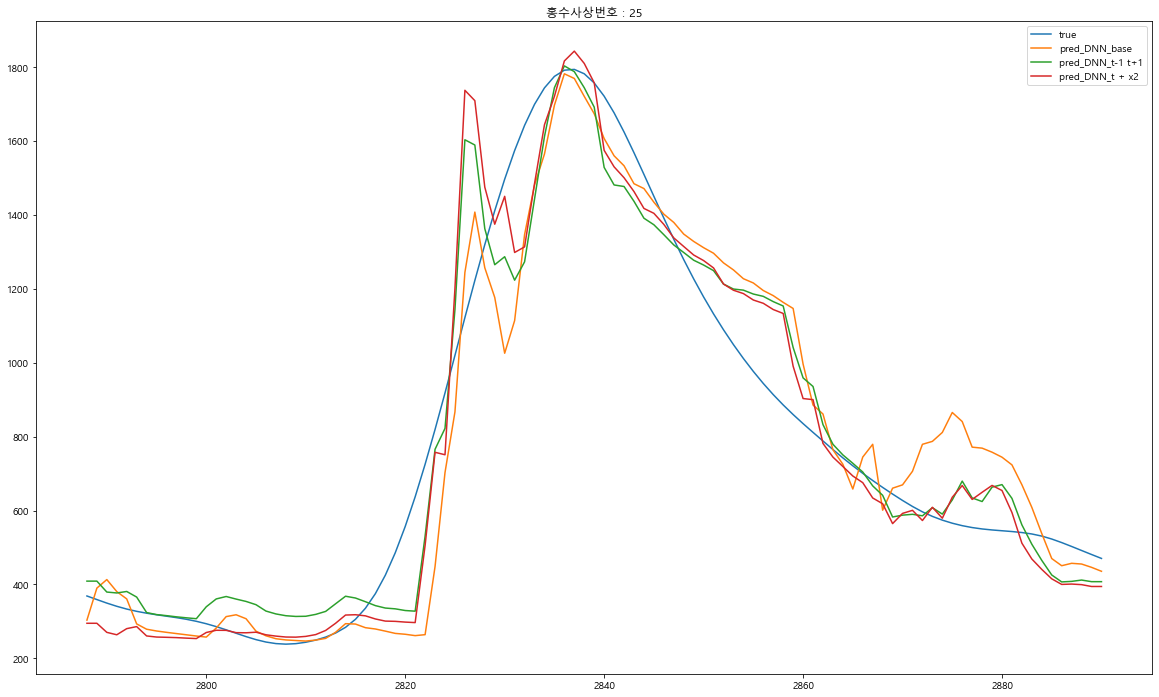

In [17]:
plot_hongsunum(predict_df, names = ['DNN_base', 'DNN_t-1 t+1', 'DNN_t + x2'])